In [1]:
#Importing packages and setting the working directory
import os
import glob
import pandas as pd
import numpy as np
os.chdir("C:/users/pravi/dell_ds")
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# # Data Cleaning

In [2]:
# Concatenating the three CSV files
#Use glob to match the pattern ‘csv’
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [3]:
#combine all files in the list
combined_df = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_df.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [4]:
combined_df.head()


,user_id,prod_id,sex,age_cat,credit_status_cd,edcution_cat,years_in_residence,car_ownership,prod_cat_1,prod_cat_2,prod_cat_3,revenue_usd
0,DCN-1000001,DSKU-P00069042,F,18-25,10,university,2,0,3,NaN,NaN,9847.06
1,DCN-1000001,DSKU-P00248942,F,18-25,10,university,2,0,1,6.0,14.0,17882.35
2,DCN-1000001,DSKU-P00087842,F,18-25,10,university,2,0,12,NaN,NaN,1672.94
3,DCN-1000001,DSKU-P00085442,F,18-25,10,university,2,0,12,14.0,NaN,1243.53
4,DCN-1000002,DSKU-P00285442,M,55+,16,high,4+,0,8,NaN,NaN,9375.29


In [5]:
combined_df.describe()

,credit_status_cd,car_ownership,prod_cat_1,prod_cat_2,prod_cat_3,revenue_usd
count,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,8.08271,0.408797,5.295546,9.842144,12.669840,10981.011587
std,6.52412,0.491612,3.750701,5.087259,4.124341,5860.026037
min,0.00000,0.000000,1.000000,2.000000,3.000000,217.650000
25%,2.00000,0.000000,1.000000,5.000000,9.000000,6901.180000
50%,7.00000,0.000000,5.000000,9.000000,14.000000,9484.710000
75%,14.00000,1.000000,8.000000,15.000000,16.000000,14203.530000
max,20.00000,1.000000,18.000000,18.000000,18.000000,28189.410000


In [6]:
# another way to concatenate csv files
#file1 = open("customer-1.csv", "a")
#file2 = open("customer-2.csv", "r")
#file3=open("customer-3.csv","r")

#for line in file2:
  # file1.write(line)
#for line in file3:
  # file1.write(line)
#file1.close()
#file2.close()
#file3.close()


In [7]:
# 2. Check the datatypes of your columns. 
combined_df.dtypes


user_id                object
prod_id                object
sex                    object
age_cat                object
credit_status_cd        int64
edcution_cat           object
years_in_residence     object
car_ownership           int64
prod_cat_1              int64
prod_cat_2            float64
prod_cat_3            float64
revenue_usd           float64
dtype: object

In [8]:
#Checking for unique values
combined_df.prod_id.value_counts()

DSKU-P00265242    1858
DSKU-P00110742    1591
DSKU-P00025442    1586
DSKU-P00112142    1539
DSKU-P00057642    1430
                  ... 
DSKU-P00068742       1
DSKU-P00364342       1
DSKU-P00104342       1
DSKU-P00104042       1
DSKU-P00314742       1
Name: prod_id, Length: 3623, dtype: int64

In [9]:
#Count of data items
combined_df.count()

user_id               537577
prod_id               537577
sex                   537577
age_cat               537577
credit_status_cd      537577
edcution_cat          537577
years_in_residence    537577
car_ownership         537577
prod_cat_1            537577
prod_cat_2            370591
prod_cat_3            164278
revenue_usd           537577
dtype: int64

In [10]:
#statistical Summary
combined_df.describe().T

,count,mean,std,min,25%,50%,75%,max
credit_status_cd,537577.0,8.082710,6.524120,0.00,2.00,7.00,14.00,20.00
car_ownership,537577.0,0.408797,0.491612,0.00,0.00,0.00,1.00,1.00
prod_cat_1,537577.0,5.295546,3.750701,1.00,1.00,5.00,8.00,18.00
prod_cat_2,370591.0,9.842144,5.087259,2.00,5.00,9.00,15.00,18.00
prod_cat_3,164278.0,12.669840,4.124341,3.00,9.00,14.00,16.00,18.00
revenue_usd,537577.0,10981.011587,5860.026037,217.65,6901.18,9484.71,14203.53,28189.41


In [11]:
#Checking for null values
combined_df.isnull().sum()


user_id                    0
prod_id                    0
sex                        0
age_cat                    0
credit_status_cd           0
edcution_cat               0
years_in_residence         0
car_ownership              0
prod_cat_1                 0
prod_cat_2            166986
prod_cat_3            373299
revenue_usd                0
dtype: int64

In [12]:
#Correcting the column name using rename function.
clean_combined_df=combined_df.rename(columns={"edcution_cat":"education_cat"})
clean_combined_df

,user_id,prod_id,sex,age_cat,credit_status_cd,education_cat,years_in_residence,car_ownership,prod_cat_1,prod_cat_2,prod_cat_3,revenue_usd
0,DCN-1000001,DSKU-P00069042,F,18-25,10,university,2,0,3,NaN,NaN,9847.06
1,DCN-1000001,DSKU-P00248942,F,18-25,10,university,2,0,1,6.0,14.0,17882.35
2,DCN-1000001,DSKU-P00087842,F,18-25,10,university,2,0,12,NaN,NaN,1672.94
3,DCN-1000001,DSKU-P00085442,F,18-25,10,university,2,0,12,14.0,NaN,1243.53
4,DCN-1000002,DSKU-P00285442,M,55+,16,high,4+,0,8,NaN,NaN,9375.29
...,...,...,...,...,...,...,...,...,...,...,...,...
137572,DCN-1004737,DSKU-P00193542,M,36-45,16,high,1,0,1,2.0,NaN,13722.35
137573,DCN-1004737,DSKU-P00111142,M,36-45,16,high,1,0,1,15.0,16.0,22583.53
137574,DCN-1004737,DSKU-P00345942,M,36-45,16,high,1,0,8,15.0,NaN,9462.35
137575,DCN-1004737,DSKU-P00285842,M,36-45,16,high,1,0,5,NaN,NaN,8437.65


In [13]:
#replacing null values to zeros
clean_combined_df=clean_combined_df.fillna(0)

In [14]:
clean_combined_df.dtypes

user_id                object
prod_id                object
sex                    object
age_cat                object
credit_status_cd        int64
education_cat          object
years_in_residence     object
car_ownership           int64
prod_cat_1              int64
prod_cat_2            float64
prod_cat_3            float64
revenue_usd           float64
dtype: object

In [15]:
clean_combined_df.head()

,user_id,prod_id,sex,age_cat,credit_status_cd,education_cat,years_in_residence,car_ownership,prod_cat_1,prod_cat_2,prod_cat_3,revenue_usd
0,DCN-1000001,DSKU-P00069042,F,18-25,10,university,2,0,3,0.0,0.0,9847.06
1,DCN-1000001,DSKU-P00248942,F,18-25,10,university,2,0,1,6.0,14.0,17882.35
2,DCN-1000001,DSKU-P00087842,F,18-25,10,university,2,0,12,0.0,0.0,1672.94
3,DCN-1000001,DSKU-P00085442,F,18-25,10,university,2,0,12,14.0,0.0,1243.53
4,DCN-1000002,DSKU-P00285442,M,55+,16,high,4+,0,8,0.0,0.0,9375.29


In [16]:
#statistical Summary
clean_combined_df.describe().T

,count,mean,std,min,25%,50%,75%,max
credit_status_cd,537577.0,8.082710,6.524120,0.00,2.00,7.00,14.00,20.00
car_ownership,537577.0,0.408797,0.491612,0.00,0.00,0.00,1.00,1.00
prod_cat_1,537577.0,5.295546,3.750701,1.00,1.00,5.00,8.00,18.00
prod_cat_2,537577.0,6.784907,6.211618,0.00,0.00,5.00,14.00,18.00
prod_cat_3,537577.0,3.871773,6.265963,0.00,0.00,0.00,8.00,18.00
revenue_usd,537577.0,10981.011587,5860.026037,217.65,6901.18,9484.71,14203.53,28189.41


In [17]:
#Saving the clean data to a csv file
clean_combined_df.to_csv("clean_combined_csv.csv",header=True,index=False,mode="w")

# #.Exploaratory Data Analysis


Text(0.5, 1.0, 'Revenue Distribution')

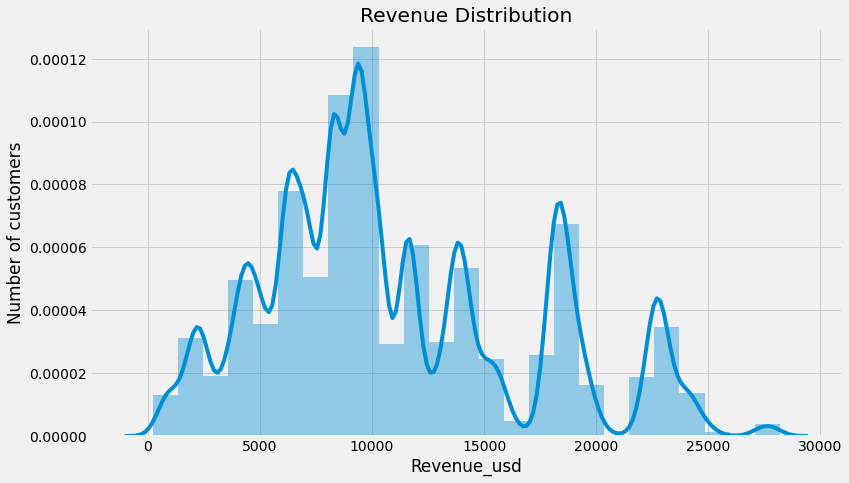

In [18]:
#Distribution of the target variable: Revenue_usd
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(clean_combined_df.revenue_usd, bins = 25)
plt.xlabel("Revenue_usd")
plt.ylabel("Number of customers")
plt.title("Revenue Distribution")

In [19]:
#Productwise grouping
prod_df =clean_combined_df.groupby(["prod_id"]).sum()["revenue_usd"].reset_index()
prod_df

,prod_id,revenue_usd
0,DSKU-P00000142,14814309.47
1,DSKU-P00000242,4605765.94
2,DSKU-P00000342,1483980.04
3,DSKU-P00000442,519027.05
4,DSKU-P00000542,930845.87
...,...,...
3618,DSKU-P0099442,3309781.17
3619,DSKU-P0099642,98482.36
3620,DSKU-P0099742,1137731.77
3621,DSKU-P0099842,848628.19


In [20]:
#Sorting the product_id's  based on the revenue generated
prod_df = prod_df.sort_values(["revenue_usd"], ascending=False)

prod_df=prod_df.reset_index(drop=True)

In [21]:
#Locating Top 25 products 
prod_df=prod_df.iloc[0:10]
prod_df

,prod_id,revenue_usd
0,DSKU-P00025442,32391089.42
1,DSKU-P00110742,31038316.56
2,DSKU-P00255842,29002872.92
3,DSKU-P00184942,28306907.01
4,DSKU-P00059442,28174469.39
5,DSKU-P00112142,28097204.74
6,DSKU-P00110942,27332397.61
7,DSKU-P00237542,27172337.61
8,DSKU-P00057642,26463164.86
9,DSKU-P00010742,25723578.80


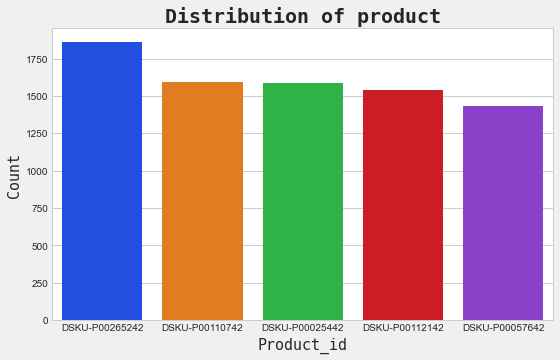

In [23]:
# Creating a barplot for 'product_id'
gen = clean_combined_df["prod_id"].value_counts()
gen=gen.iloc[0:5]
plt.figure(figsize = (8, 5))
plt.style.use('seaborn-whitegrid')
sns.barplot(gen.index, gen.values, palette = 'bright')
plt.title('Distribution of product', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Product_id', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15,})
plt.ylabel('Count', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

In [24]:
#The top 5 sold products are plotted above

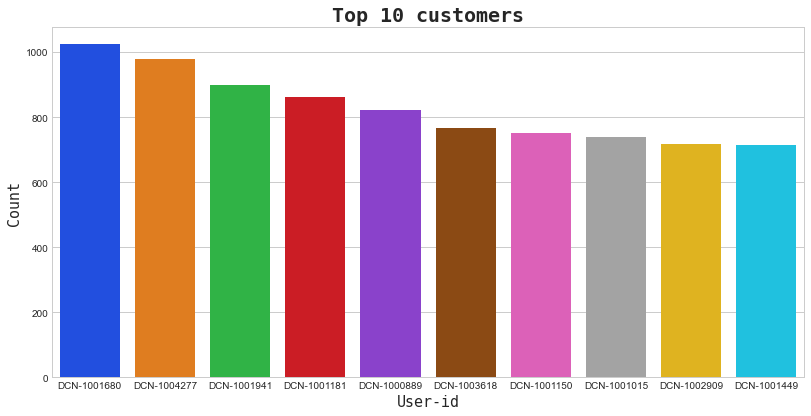

In [25]:
# Creating a barplot for 'user_id'
gen = clean_combined_df["user_id"].value_counts()
gen=gen.iloc[0:10]
plt.figure(figsize = (12, 6))
plt.style.use('seaborn-whitegrid')
sns.barplot(gen.index, gen.values, palette = 'bright')
plt.title('Top 10 customers', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('User-id', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15,})
plt.ylabel('Count', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

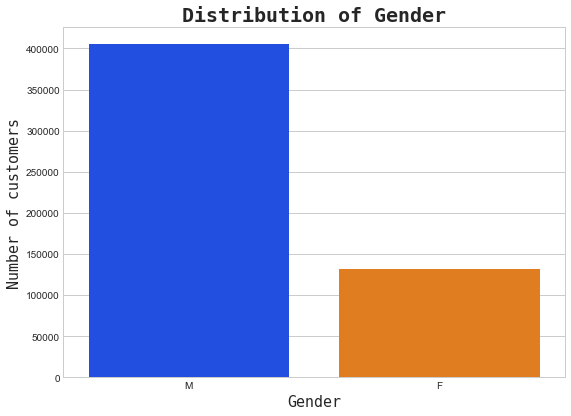

In [26]:
# Creating a barplot for 'Gender'
gen = clean_combined_df["sex"].value_counts()
plt.figure(figsize = (8, 6))
plt.style.use('seaborn-whitegrid')
sns.barplot(gen.index, gen.values, palette = 'bright')
plt.title('Distribution of Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15,})
plt.ylabel('Number of customers', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

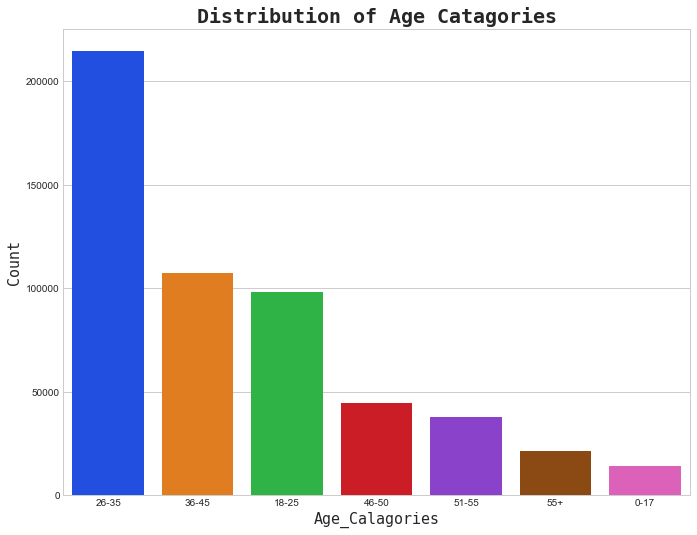

In [27]:
# Creating a pie cart for age catagories
age = clean_combined_df["age_cat"].value_counts()

plt.figure(figsize = (10, 8))
plt.style.use('seaborn-whitegrid')
sns.barplot(age.index, age.values, palette = 'bright')
plt.title('Distribution of Age Catagories', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Age_Calagories', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15,})
plt.ylabel('Count', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

In [28]:
#Alternate method for the above bar chart
#sns.countplot(clean_combined_df["age_cat"])

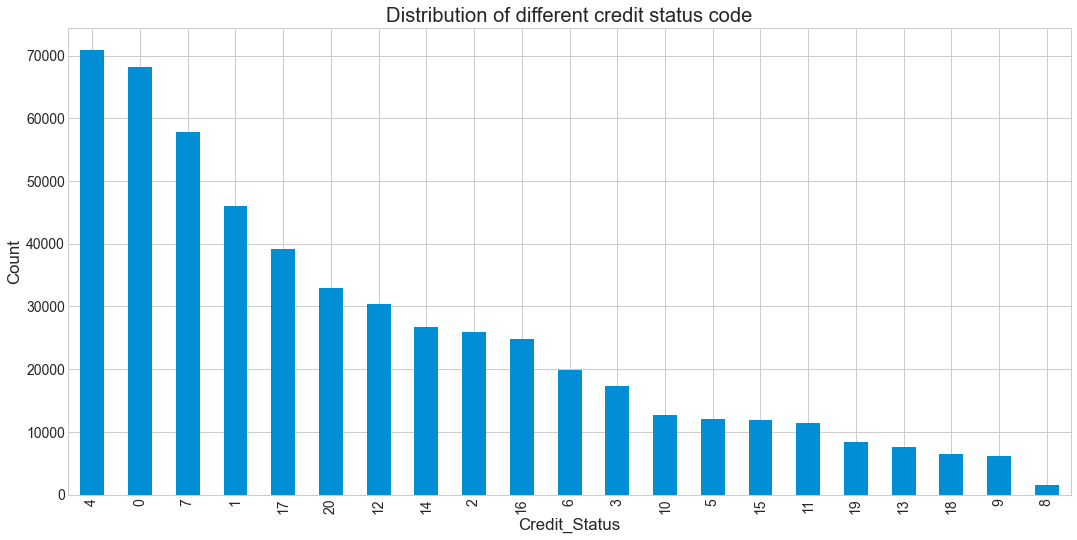

In [29]:
# Creating a bar chart for 'credit status'

plt.figure(figsize=(16,8))

pd.value_counts(clean_combined_df['credit_status_cd']).plot.bar();
plt.xlabel('Credit_Status');
plt.ylabel('Count');
plt.title('Distribution of different credit status code')

plt.show()


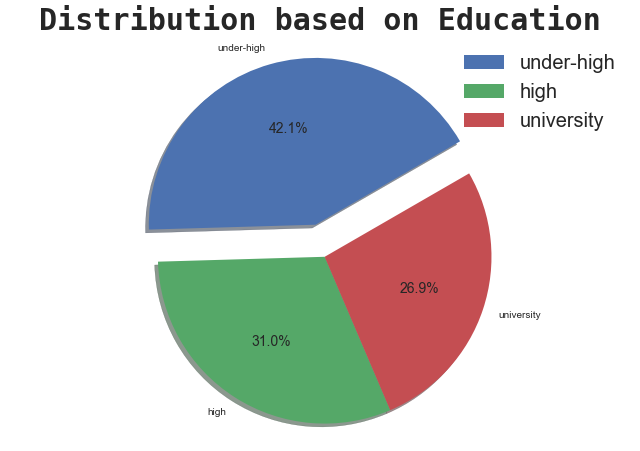

In [30]:
# Creating a pie chart for 'Education category'
education = clean_combined_df['education_cat'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize = (10, 7))
plt.pie(education.values, labels = education.index, startangle = 30, explode = (0.20 , 0, 0), shadow = True, autopct = '%1.1f%%')
plt.title('Distribution based on Education', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.legend()
plt.legend(prop = {'size' : 20})
plt.axis('equal')
plt.show()

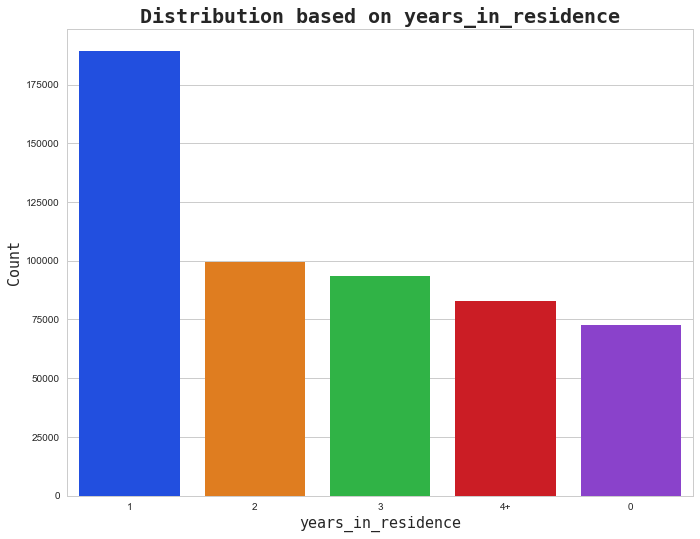

In [31]:
# Creating a barchart for 'years_in_residence'
years = clean_combined_df['years_in_residence'].value_counts()

plt.figure(figsize = (10, 8))
plt.style.use('seaborn-whitegrid')
sns.barplot(years.index, years.values, palette = 'bright')
plt.title('Distribution based on years_in_residence', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('years_in_residence', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15,})
plt.ylabel('Count', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

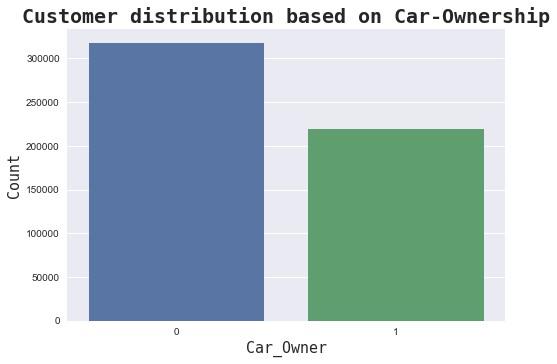

In [32]:
# Creating a plot for car_owner status
owner = clean_combined_df['car_ownership']

plt.style.use('seaborn')

plt.figure(figsize = (7, 5))
sns.countplot(owner)
plt.title('Customer distribution based on Car-Ownership', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Car_Owner', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Count', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

In [33]:
#To see the average revenue generated based on Gender
gender_pivot = clean_combined_df.pivot_table(index='sex', values="revenue_usd", aggfunc=np.mean)
gender_pivot

,revenue_usd
sex,
F,10364.425129
M,11182.084359


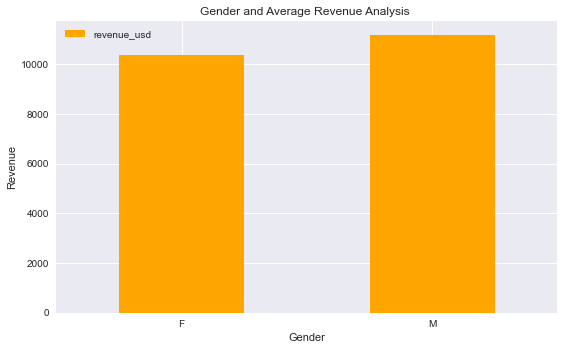

In [34]:
#Creating a bar chart on Revenue generated based on Gender
gender_pivot.plot(kind='bar', color='orange',figsize=(8,5))
plt.xlabel("Gender")
plt.ylabel("Revenue")
plt.title("Gender and Average Revenue Analysis ")
plt.xticks(rotation=0)
plt.show()

In [35]:
#Average revenue generated based on age catagories
age_pivot = clean_combined_df.pivot_table(index='age_cat', values="revenue_usd", aggfunc=np.sum)
age_pivot

,revenue_usd
age_cat,
0-17,1.476588e+08
18-25,1.066048e+09
26-35,2.352695e+09
36-45,1.188999e+09
46-50,4.863744e+08
51-55,4.257745e+08
55+,2.355888e+08


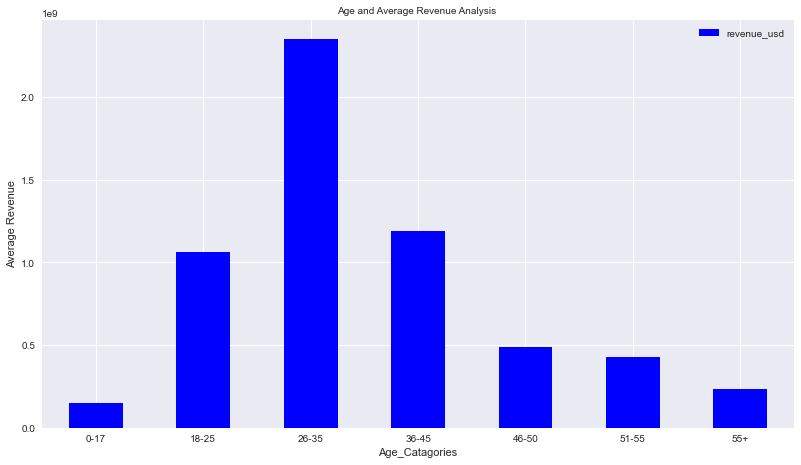

In [36]:
age_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Age_Catagories")
plt.ylabel("Average Revenue")
plt.title("Age and Average Revenue Analysis ",fontsize=10)
plt.xticks(rotation=0)
plt.show()

In [37]:
#Average revenue generated based on credit status code
credit_pivot = clean_combined_df.pivot_table(index='credit_status_cd', values="revenue_usd", aggfunc=np.mean)
credit_pivot

,revenue_usd
credit_status_cd,
0,10808.172621
1,10609.062455
2,10618.751742
3,10868.326176
4,10916.502055
5,11045.704647
6,10983.974856
7,11179.029723
8,11266.480525


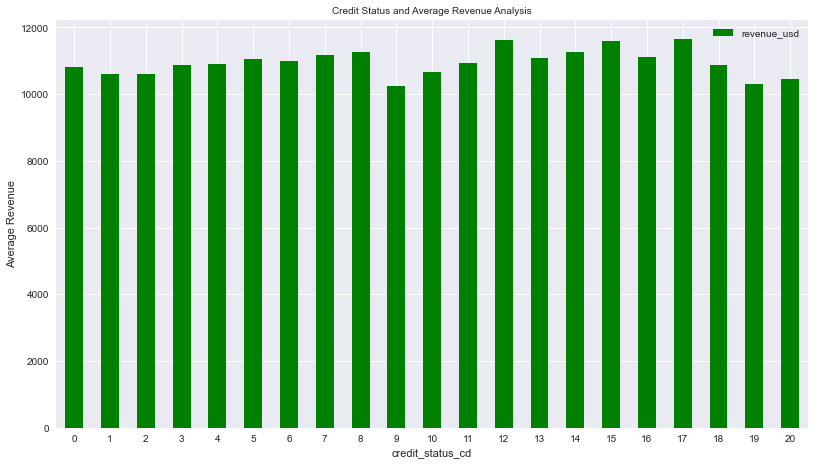

In [38]:
credit_pivot.plot(kind='bar', color='green',figsize=(12,7))
plt.xlabel("credit_status_cd")
plt.ylabel("Average Revenue")
plt.title("Credit Status and Average Revenue Analysis",fontsize=10)
plt.xticks(rotation=0)
plt.show()

In [39]:
#Average revenue generated based on Education Catagory
education_pivot = clean_combined_df.pivot_table(index='education_cat', values="revenue_usd", aggfunc=np.mean)
education_pivot

,revenue_usd
education_cat,
high,11581.696298
under-high,10821.950408
university,10538.836476


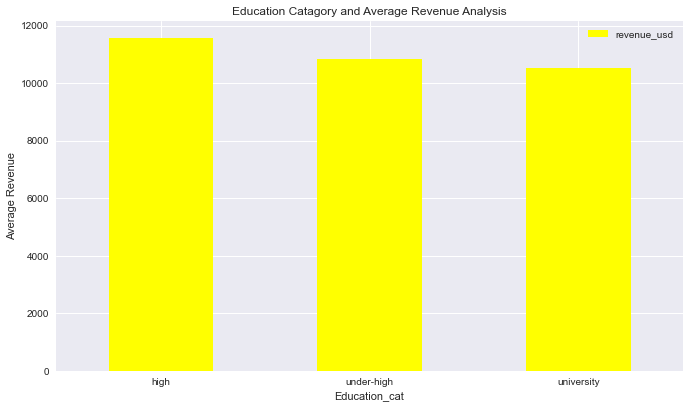

In [40]:
education_pivot.plot(kind='bar', color='yellow',figsize=(10,6))
plt.xlabel("Education_cat")
plt.ylabel("Average Revenue")
plt.title("Education Catagory and Average Revenue Analysis")
plt.xticks(rotation=0)
plt.show()

In [41]:
#Average revenue generated based on Years in Residence
years_pivot = clean_combined_df.pivot_table(index='years_in_residence', values="revenue_usd", aggfunc=np.mean)
years_pivot

,revenue_usd
years_in_residence,
0,10879.104267
1,10964.547161
2,11056.008616
3,11000.806014
4+,10995.729590


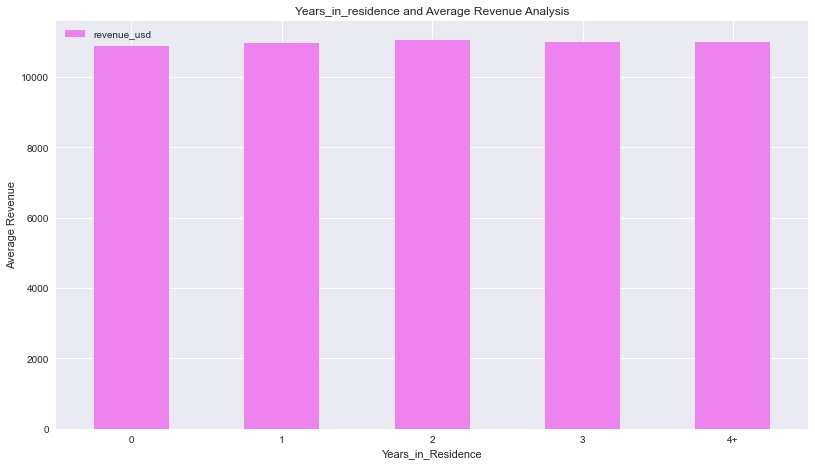

In [42]:
years_pivot.plot(kind='bar', color='violet',figsize=(12,7))
plt.xlabel("Years_in_Residence")
plt.ylabel("Average Revenue")
plt.title("Years_in_residence and Average Revenue Analysis")
plt.xticks(rotation=0)
plt.show()

In [43]:
#Average revenue generated based on car_ownership
car_pivot = clean_combined_df.pivot_table(index='car_ownership', values="revenue_usd", aggfunc=np.mean)
car_pivot

,revenue_usd
car_ownership,
0,10980.382902
1,10981.920792


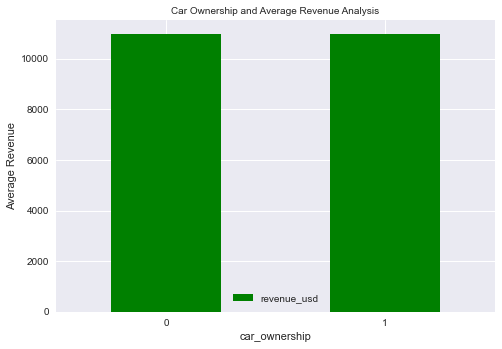

In [44]:
car_pivot.plot(kind='bar', color='green',figsize=(7,5))
plt.xlabel("car_ownership")
plt.ylabel("Average Revenue")
plt.title("Car Ownership and Average Revenue Analysis",fontsize=10)
plt.xticks(rotation=0)
plt.show()

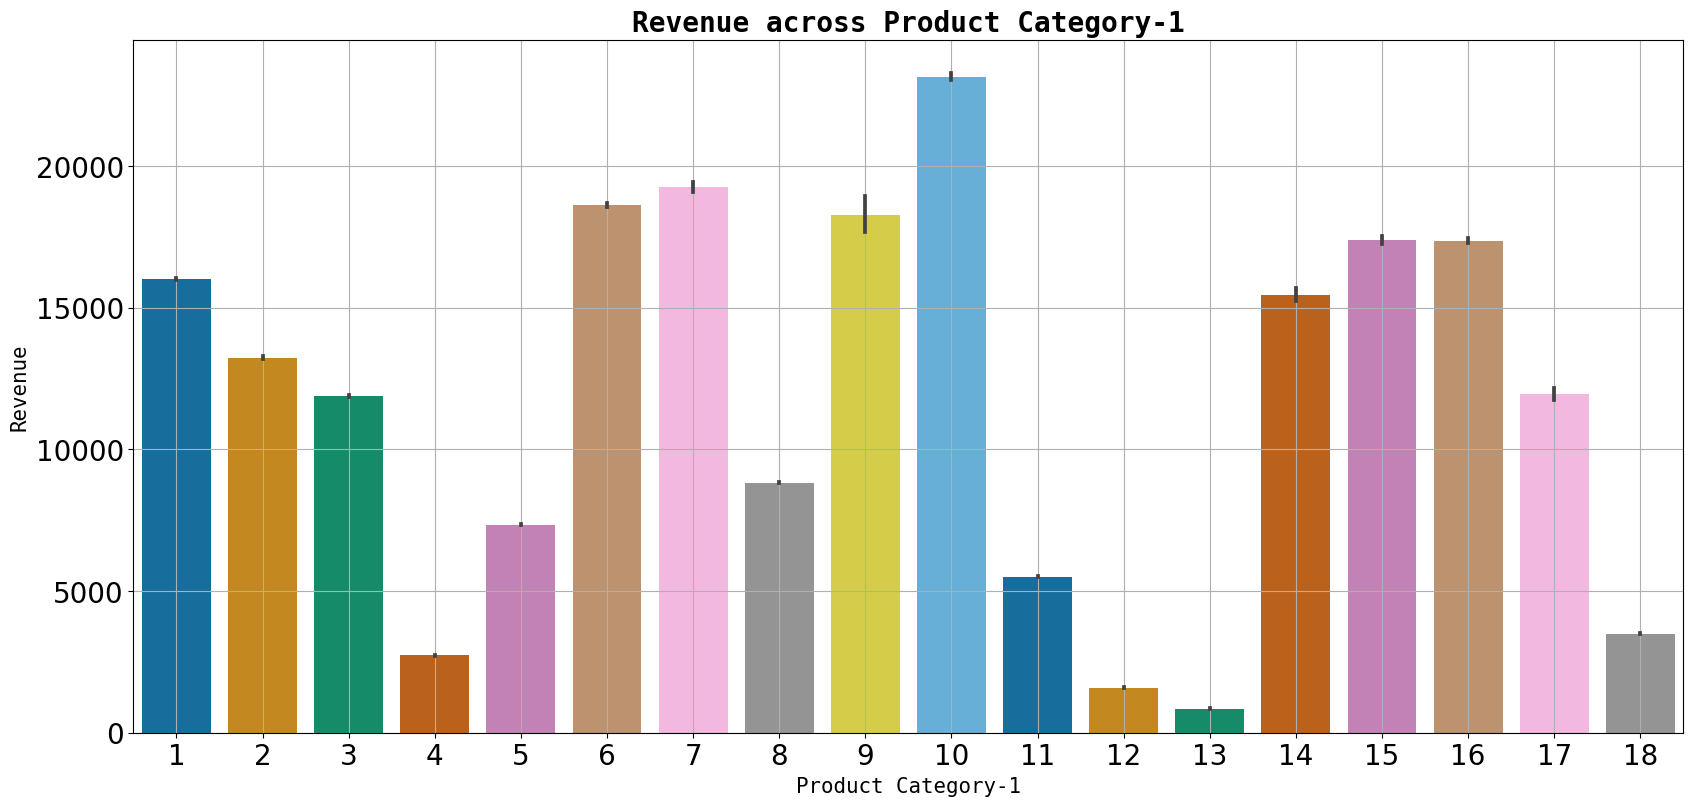

In [45]:
# Creating a barplot of 'Revenue acress Product catagory-1'
plt.style.use('default')
plt.figure(figsize = (20, 9))
sns.barplot(clean_combined_df['prod_cat_1'], clean_combined_df['revenue_usd'], palette = 'colorblind')
plt.title('Revenue across Product Category-1', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Product Category-1', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Revenue', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 20)
plt.grid()
plt.show()

In [46]:
import plotly.express as px
# A bar plot showing Productwise Revenue generated
fig = px.bar(prod_df, x="prod_id", y="revenue_usd", color="prod_id", hover_data=['revenue_usd'],title="Productwise Revenue generated")
fig.show()
fig.write_image("prod_id.png")

In [47]:
#Data Analysis done by Praveeja Sasidharan Suni